In [0]:
pip install spark.nlp

Python interpreter will be restarted.
  Using cached spark_nlp-4.2.3-py2.py3-none-any.whl (648 kB)
Python interpreter will be restarted.


In [0]:
pip install nltk

Python interpreter will be restarted.
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached regex-2022.10.31-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
Python interpreter will be restarted.


In [0]:
pip install proj

Python interpreter will be restarted.
  Using cached proj-0.2.0-py2.py3-none-any.whl (8.6 kB)
  Using cached arrow-1.2.3-py3-none-any.whl (66 kB)
Python interpreter will be restarted.


In [0]:
pip install basemap

Python interpreter will be restarted.
  Using cached basemap-1.3.6-cp39-cp39-manylinux1_x86_64.whl (864 kB)
  Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached pyproj-3.4.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.7 MB)
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-db0e6be5-0236-439c-b353-fc415d705e21
    Can't uninstall 'numpy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatib

In [0]:
glos_comm = spark.read.parquet("/FileStore/glossier/glossier_comments")

cols = ("author_cakeday","author_flair_css_class","author_flair_text","permalink","stickied","gilded","distinguished","can_gild","retrieved_on","edited")
glos_comm = glos_comm.drop(*cols)
glos_comm = glos_comm.withColumn("created_utc",glos_comm.created_utc.cast('timestamp'))

glos_comm.createOrReplaceTempView("glos_comm_vw")
glos_comm_final = glos_comm

glos_sub = spark.read.parquet("/FileStore/glossier/glossier_submissions")


cols = ("whitelist_status","url","thumbnail_width","thumbnail_height","thumbnail","third_party_tracking_2","third_party_tracking","third_party_trackers","suggested_sort",
       "secure_media_embed", "retrieved_on", "promoted_url", "parent_whitelist_status", "link_flair_text", "link_flair_css_class", "imp_pixel", "href_url", "gilded", "embed_url", 
       "author_flair_css_class", "author_cakeday","adserver_imp_pixel", "adserver_click_url", "secure_media_embed", "secure_media", "post_hint", "permalink", "original_link", 
       "mobile_ad_url", "embed_type", "domain_override", "domain", "author", "preview", "author_flair_text", "edited", "crosspost_parent_list", "media", "media_embed")
glos_sub = glos_sub.drop(*cols)

glos_sub_final = glos_sub.withColumn("created_utc",glos_sub.created_utc.cast('timestamp'))


In [0]:
top_prods = glos_comm_final.select("body")
new = glos_sub_final.select("title").alias("body")


In [0]:
top_prods = top_prods.union(new)

In [0]:
import pandas

twitter_loc = pandas.read_csv("/Workspace/Repos/cag199@georgetown.edu/fall-2022-project-eda-adb-project-group-16/data/twitter_data1.csv")
adnl_glossier = pandas.read_csv("/Workspace/Repos/cag199@georgetown.edu/fall-2022-project-eda-adb-project-group-16/data/glossier_storecomments_reddit.csv")

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

twitterDF=spark.createDataFrame(twitter_loc) 
twitterDF.printSchema()
twitterDF.show()

#twitterrdd = sc.parallelize([twitter_loc])
#twitterdf = spark.createDataFrame(twitterrdd)

root
 |-- body: string (nullable = true)

+--------------------+
|                body|
+--------------------+
|    Philadelphia, PA|
|             she/her|
|      Leeds, England|
|         Chicago, IL|
|      Leeds, England|
|    Philadelphia, PA|
|     tinista & livie|
|       New York, USA|
|             Atlanta|
|Greenwich, CT and NY|
|        she/her | 21|
|          NSB 4ever |
|         Chicago, IL|
|        briddynicole|
|           Argentina|
|she/her - los ang...|
|             houston|
|she/her, liviesHQ...|
| 19 | she/her || pan|
|seattle, wa | he/him|
+--------------------+
only showing top 20 rows



In [0]:
glossDF=spark.createDataFrame(adnl_glossier) 
glossDF.printSchema()
glossDF.show()

root
 |-- body: string (nullable = true)

+--------------------+
|                body|
+--------------------+
|Stockholm! they h...|
| need one in toronto|
|I'd love for them...|
|I think a glossie...|
|      Washington DC!|
|            Chicago!|
|           Stockholm|
|I can picture a c...|
|Purely for my own...|
|I think Glossier ...|
|     Charleston SC!!|
|        Philadelphia|
|          Stockholm!|
|Bordeaux in France! |
|Boston. I know th...|
|Portland, OR woul...|
|Austin, TX! they ...|
|Paris ?? Somewher...|
|  Dallas or Houston.|
|       Washington DC|
+--------------------+
only showing top 20 rows



In [0]:
new_test = glossDF.union(twitterDF)

In [0]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import udf, col, lower, regexp_replace, translate
new_test.count()
new_test = new_test.withColumn("body",lower(translate('body', '!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~', ' ')))
new_test.count()

/databricks/python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Out[8]: 251

In [0]:
import pandas as pd
##cities dataset via GeoLite2 city dataset, provided by Maxmind
cities_df = pd.read_csv("/Workspace/Repos/cag199@georgetown.edu/fall-2022-project-eda-adb-project-group-16/data/worldcities1.csv")
cities_df['city'] = cities_df['city'].str.lower()
cities_df1 = cities_df['city'].str.lower()
#cities_df = cities_df.city_name.unique()
print(cities_df1.head(10))

0          tokyo
1        jakarta
2          delhi
3         manila
4      sao paulo
5          seoul
6         mumbai
7       shanghai
8    mexico city
9      guangzhou
Name: city, dtype: object


In [0]:
cities_df1 = cities_df1.tolist()
print(type(cities_df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
"oslo" in cities_df1

Out[11]: True

In [0]:
import pyspark.sql.functions as psf
new_test.createOrReplaceTempView("new_test_vw")
new_test.withColumn('cities',psf.when(lower(psf.col('body')).rlike('({})\d'.format('|'.join(cities_df1))), '1').otherwise('')).show()

+--------------------+------+
|                body|cities|
+--------------------+------+
|stockholm  they h...|      |
| need one in toronto|      |
|id love for them ...|      |
|i think a glossie...|      |
|      washington dc |      |
|            chicago |      |
|           stockholm|      |
|i can picture a c...|      |
|purely for my own...|      |
|i think glossier ...|      |
|     charleston sc  |      |
|        philadelphia|      |
|          stockholm |      |
|bordeaux in france  |      |
|boston i know the...|      |
|portland or would...|      |
|austin tx  they d...|      |
|paris  somewhere ...|      |
|   dallas or houston|      |
|       washington dc|      |
+--------------------+------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import array, lit
city_newdf = spark.sql(
  """ with t1 ( select body, array('stockholm','san francisco','seattle', 'london', 'brooklyn', 'oslo', 'boston', 'philadelphia','minneapolis', 'wolverhampton', 'kent', 'indianapolis', 'paris', 'miami', 'atlanta', 'new york','houston', 'los angeles','chicago','toronto', 'washington dc','charleston','bordeaux', 'austin','melbourne','madre linda','dublin','dartford','vancouver', 'dallas', 'san juan', 'copenhagen', 'portland','buenos aires','cape may','denver', 'selangor','ipoh','san diego','stirling','leeds', 'phoenix','tucson', 'gothenburg', 'st. louis','greenwich','suzhou', 'montreal', 'nashville','new orleans','savannah','pittsburgh','honolulu','hong kong','albuquerque', 'oxford','edinburgh', 'asbury park','charlotte', 'orlando', 'cincinnati','oakland','san jose','quebec', 'lake worth','midlands', 'canyon lake','salt lake city', 'baltimore') as a1 from new_test_vw),
     t2 (select body,  filter(a1, x -> body like x||'%') a1f from t1)
     select body, a1f as cities from t2
  """)

In [0]:
city_newdf = city_newdf.select(col("cities"))

In [0]:
from pyspark.sql.functions import explode
city_newdf = city_newdf.select(explode(city_newdf.cities))

In [0]:
import pyspark.sql.functions as f
newdf_count = city_newdf.withColumn('city', f.col('col')) \
  .groupBy('city') \
  .count().sort('count', ascending=False)
#newdf_count.show(30)

In [0]:
from pyspark.sql.window import Window
newdf_count1 = newdf_count\
  .withColumn('total', f.sum('count').over(Window.partitionBy()))\
  .withColumn('percent', (f.col('count')/f.col('total'))*100)

In [0]:
from pyspark.sql.functions import round, col
data = newdf_count1.select(col("city"),round(col("percent"),2))
#newdf = new_test.filter(new_test.body.isin(cities_df1))
#data.show()

In [0]:
 df = data.selectExpr("city", "`round(percent, 2)` as percent")
 df.show(5)

+-------------+-------+
|         city|percent|
+-------------+-------+
|      chicago|   5.51|
|san francisco|   5.51|
|      seattle|   4.72|
|       london|   4.72|
|  los angeles|   4.72|
+-------------+-------+
only showing top 5 rows



In [0]:
pandas_cities = newdf_count.toPandas()

In [0]:
cities_df['city']=cities_df['city'].astype(str)
pandas_cities['city']=pandas_cities['city'].astype(str)

In [0]:
fullnew = pandas_cities.merge(cities_df,how='left', on='city')

In [0]:
fullnew.head(4)

,city,count,lat,lng,country,iso2,iso3
0,chicago,7,41.8373,-87.6862,United States,US,USA
1,san francisco,7,37.7562,-122.4430,United States,US,USA
2,seattle,6,47.6211,-122.3244,United States,US,USA
3,london,6,51.5072,-0.1275,United Kingdom,GB,GBR


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


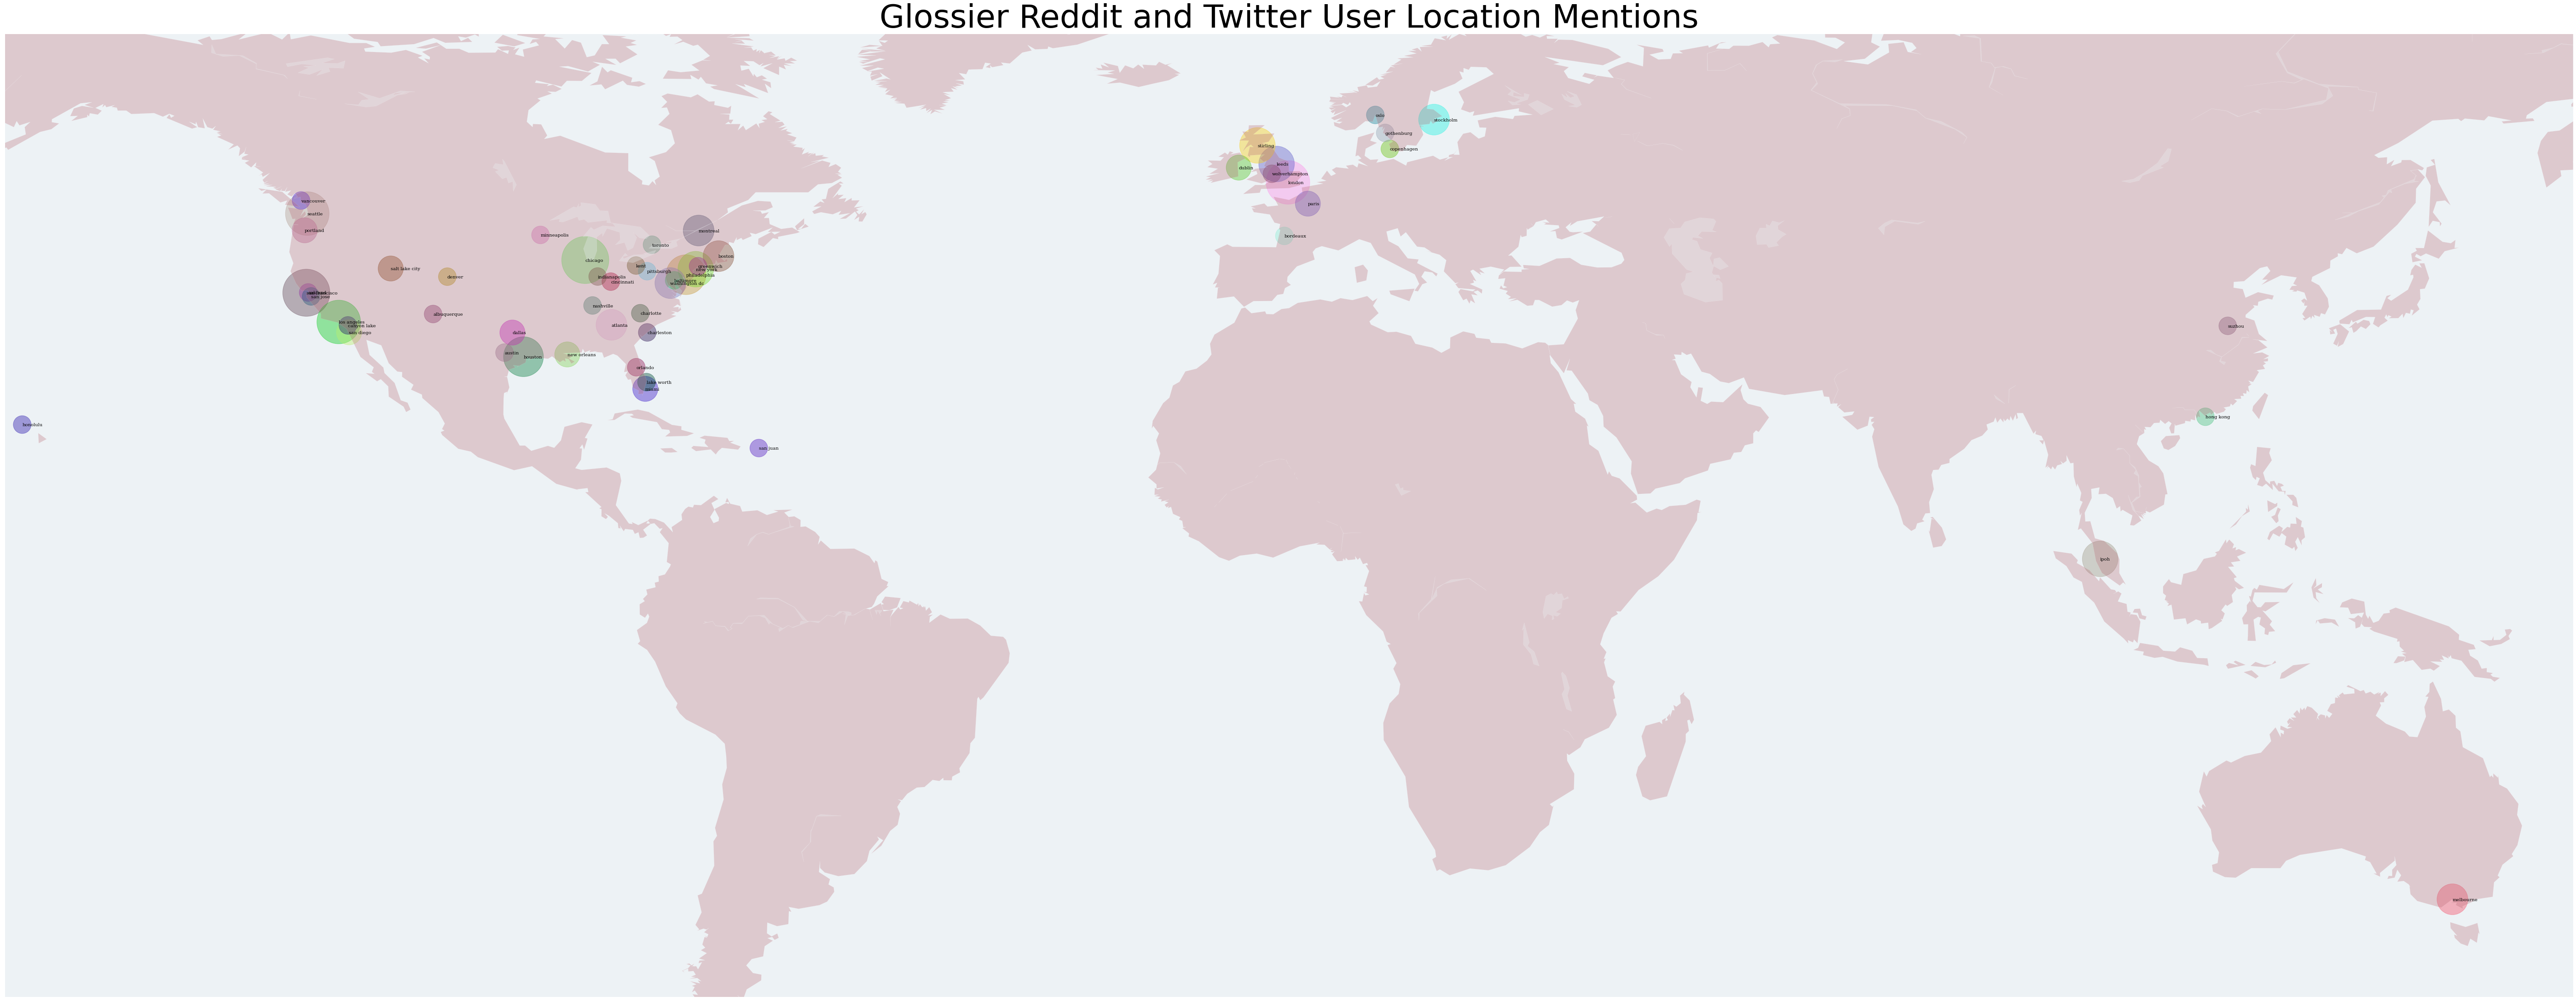

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# Set the dimension of the figure
plt.rcParams["figure.figsize"]=100,40;

# Make the background map
m=Basemap(llcrnrlon=-160, llcrnrlat=-50, urcrnrlon=160, urcrnrlat=70)
m.drawmapboundary(fill_color='#edf2f5', linewidth=0)
m.fillcontinents(color='#B86B77', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
scatter = m.scatter(
    x=fullnew['lng'], 
    y=fullnew['lat'], 
    s=fullnew['count']*1500, 
    alpha=0.4, 
    #c = fullnew['city'],
    c=np.random.rand(len(fullnew['city']),3), 
    #label = fullnew['city'],
    cmap="spring"
)
plt.title("Glossier Reddit and Twitter User Location Mentions", fontdict={'fontsize': 70})


for i in range(len(fullnew['city'])):
    plt.text(fullnew['lng'][i], fullnew['lat'][i], fullnew['city'][i],fontsize=10,fontfamily = 'serif',#fontweight='bold', (fullnew['count'][i]*5)
                    ha='left',va='center_baseline',color='k')